### Computer Vision Internship Program



#### Practical Task description:
Your task is to write to a pipeline to classify images from MNIST dataset
(http://yann.lecun.com/exdb/mnist/)  using Neural Networks!



![alt text](mnist.png "Title")


##### To complete this task, you will have to implement the following steps:
<br> 1. Download and read the data - 10 points
<br> 2. Show how you use augmentation functions. To get the points, visualize the original image vs augmented image using 4 augmentation techniques of your choice - 10 points
<br> 3. Implement a Neural Network which classifies given images. You can use any deep learning framework - 10 points
<br> 4. Implement a training procedure using your dataloader, augmentation functions and neural network - 10 points
<br> 5. Plot loss graph - 10 points
<br> 6. Print accuracy of your model on test set -  10 points
<br> 7. Show us how your model works! Plot a few input images and corresponding predictions of your model - 10 points
<br> 8. Upload your work to github - 5 points. Google/dropbox/yandex drive - 0 points

Max = 75 points!

##### Main notes:
<br> *- implement your work in provided jupyter notebook 
<br> - you can use any framework 
<br> - we are not too strict about the requirements: if your work corresponds to the task wording, the chances are you will get the full points*


Please, upload to a google/dropbox/yandex drive or github  and send the link to the following google form: https://docs.google.com/forms/d/e/1FAIpQLSeeYILriugs1Vdxa3r01nS1469VT-_t_ZCNF18zwQVl-XKkHQ/viewform?usp=sf_link 

If you have any questions, please mail to:
olzhas.kabdolov@btsdigital.kz and rustem.burkhanov@btsdigital.kz 

**The deadline is 27th of May, 12 o'Clock in the noon**


####  Good luck and have fun!


##### Task 1. Dataloader

In [1]:
# Importing neccessary packages

import cv2
from PIL import Image
import keras
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image

# Loading training data

X_train, y_train = loadlocal_mnist(images_path = 'train-images-idx3-ubyte', labels_path = 'train-labels-idx1-ubyte')

# Loading testing data

X_test, y_test = loadlocal_mnist(images_path = 't10k-images-idx3-ubyte', labels_path = 't10k-labels-idx1-ubyte')
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

m = X_train.shape[0]

Using TensorFlow backend.


##### Task 2. Augmentation

Shape of training dataset X: (60000, 28, 28, 1)
Shape of training labels y: (60000,)
Shape of testing dataset X: (10000, 28, 28, 1)
Shape of testing labels y: (10000,)


/home/faranio/.local/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


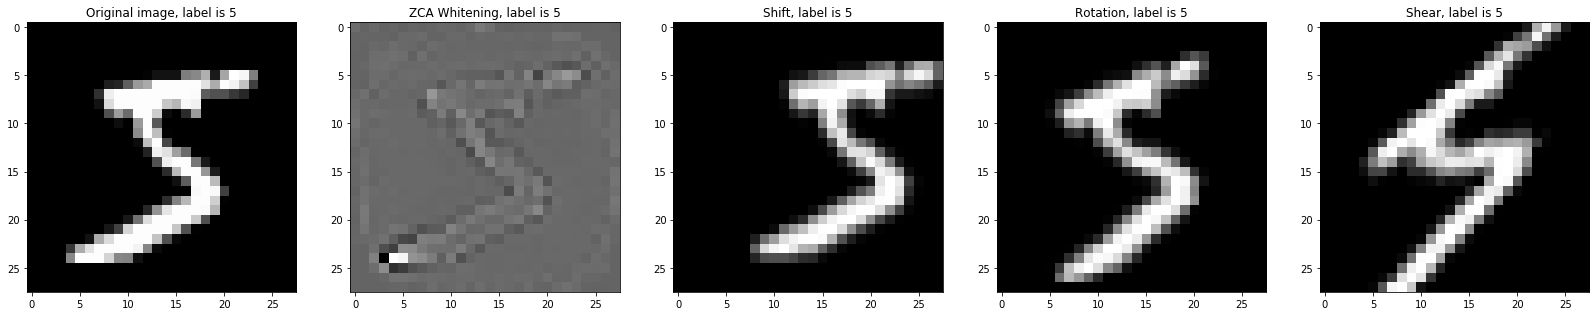

Shape of augmented training dataset X: (300000, 28, 28, 1)
Shape of augmented testing dataset y: (300000,)


In [2]:
# Printing shapes of training and testing data
# May take 2-4 minutes

print("Shape of training dataset X: " + str(X_train.shape)) #(60000, 784)
print("Shape of training labels y: " + str(y_train.shape)) #(60000, )
print("Shape of testing dataset X: " + str(X_test.shape)) #(10000, 784)
print("Shape of testing labels y: " + str(y_test.shape)) #(10000, )

# Plotting the training image example

fig = plt.figure(figsize = (28, 28))
columns = 5
rows = 1

K.set_image_dim_ordering('tf')

fig.add_subplot(rows, columns, 1)
plt.title('Original image, label is {label}'.format(label = y_train[0]))
plt.imshow(X_train[0].reshape(28, 28), cmap = plt.get_cmap('gray'))

# Data augmentation technique 1: ZCA Whitening
 
image_generator = ImageDataGenerator(zca_whitening = True)

image_generator.fit(X_train)
X_train_augmented_1 = X_train.copy()
y_train_augmented_1 = y_train.copy()
X_train_augmented_1 = image_generator.flow(X_train_augmented_1, np.zeros(m), batch_size = m, shuffle = False).next()[0]

fig.add_subplot(rows, columns, 2)
plt.title('ZCA Whitening, label is {label}'.format(label = y_train_augmented_1[0]))
plt.imshow(X_train_augmented_1[0].reshape(28, 28), cmap = plt.get_cmap('gray'))

# Data augmentation technique 2: Shift

image_generator = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2)

image_generator.fit(X_train)
X_train_augmented_2 = X_train.copy()
y_train_augmented_2 = y_train.copy()
X_train_augmented_2 = image_generator.flow(X_train_augmented_2, np.zeros(m), batch_size = m, shuffle = False).next()[0]

fig.add_subplot(rows, columns, 3)
plt.title('Shift, label is {label}'.format(label = y_train_augmented_2[0]))
plt.imshow(X_train_augmented_2[0].reshape(28, 28), cmap = plt.get_cmap('gray'))

# Data augmentation technique 3: Rotation

image_generator = ImageDataGenerator(rotation_range = 30)

image_generator.fit(X_train)
X_train_augmented_3 = X_train.copy()
y_train_augmented_3 = y_train.copy()
X_train_augmented_3 = image_generator.flow(X_train_augmented_3, np.zeros(m), batch_size = m, shuffle = False).next()[0]

fig.add_subplot(rows, columns, 4)
plt.title('Rotation, label is {label}'.format(label = y_train_augmented_3[0]))
plt.imshow(X_train_augmented_3[0].reshape(28, 28), cmap = plt.get_cmap('gray'))

# Data augmentation technique 4: Shear

image_generator = ImageDataGenerator(shear_range = 50)

image_generator.fit(X_train)
X_train_augmented_4 = X_train.copy()
y_train_augmented_4 = y_train.copy()
X_train_augmented_4 = image_generator.flow(X_train_augmented_4, np.zeros(m), batch_size = m, shuffle = False).next()[0]

fig.add_subplot(rows, columns, 5)
plt.title('Shear, label is {label}'.format(label = y_train_augmented_4[0]))
plt.imshow(X_train_augmented_4[0].reshape(28, 28), cmap = plt.get_cmap('gray'))
plt.show()

# Adding the augmented data into the original dataset

X_train = np.concatenate((X_train, X_train_augmented_1))
y_train = np.concatenate((y_train, y_train_augmented_1))
X_train = np.concatenate((X_train, X_train_augmented_2))
y_train = np.concatenate((y_train, y_train_augmented_2))
X_train = np.concatenate((X_train, X_train_augmented_3))
y_train = np.concatenate((y_train, y_train_augmented_3))
X_train = np.concatenate((X_train, X_train_augmented_4))
y_train = np.concatenate((y_train, y_train_augmented_4))
m = X_train.shape[0]

print("Shape of augmented training dataset X: " + str(X_train.shape))
print("Shape of augmented testing dataset y: " + str(y_train.shape))

##### Task 3. Neural Network

In [3]:
# Padding the dataset in order to pass it to LeNet-5 CNN architecture
# May take 3-5 minutes

X_train = np.pad(X_train, ((0, 0),(2, 2), (2, 2), (0, 0)), 'constant')
X_test = np.pad(X_test, ((0, 0),(2, 2), (2, 2),(0, 0)), 'constant')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Implementing the LeNet-5 CNN architecture model with Keras

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 6, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 1)))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 120, activation = 'relu'))

model.add(keras.layers.Dense(units = 84, activation = 'relu'))

model.add(keras.layers.Dense(units = 10, activation = 'softmax'))

# Showing the summary of LeNet-5 CNN architecture model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

##### Task 4. Train loop

In [4]:
# Training the LeNet-5 CNN architecture model on augmented training dataset X
# May take 5-10 minutes

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
EPOCHS = 10
BATCH_SIZE = 512
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size = BATCH_SIZE)
steps_per_epoch = X_train.shape[0] // BATCH_SIZE
model.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, epochs = EPOCHS)

Epoch 1/10
585/585 [==============================] - 45s 76ms/step - loss: 0.6605 - acc: 0.8077
Epoch 2/10
585/585 [==============================] - 44s 75ms/step - loss: 0.1931 - acc: 0.9406
Epoch 3/10
585/585 [==============================] - 45s 77ms/step - loss: 0.1263 - acc: 0.9612
Epoch 4/10
585/585 [==============================] - 45s 77ms/step - loss: 0.0945 - acc: 0.9709
Epoch 5/10
585/585 [==============================] - 46s 79ms/step - loss: 0.0766 - acc: 0.9761
Epoch 6/10
585/585 [==============================] - 46s 78ms/step - loss: 0.0655 - acc: 0.9795
Epoch 7/10
585/585 [==============================] - 47s 80ms/step - loss: 0.0572 - acc: 0.9818
Epoch 8/10
585/585 [==============================] - 47s 81ms/step - loss: 0.0507 - acc: 0.9839
Epoch 9/10
585/585 [==============================] - 46s 78ms/step - loss: 0.0445 - acc: 0.9858
Epoch 10/10
585/585 [==============================] - 47s 81ms/step - loss: 0.0401 - acc: 0.9870


##### Task 5. Loss plot

dict_keys(['loss', 'acc'])


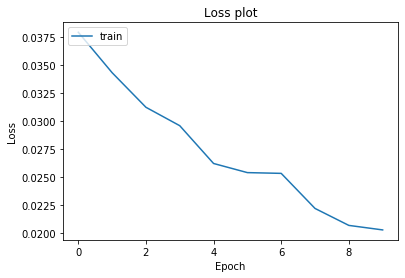

In [5]:
# Plotting the loss graph of the LeNet-5 CNN architecture model
# May take 7-15 minutes

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = 0)
print(history.history.keys())
plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

##### Task 6. Test set accuracy

In [6]:
# Printing the test set accuracy of the model

score = model.evaluate(X_test, y_test)
print('Test set loss:', score[0])
print('Test set accuracy:', score[1])

10000/10000 [==============================] - 1s 106us/step
Test set loss: 0.037812632509786996
Test set accuracy: 0.9913


##### Task 7. Inference

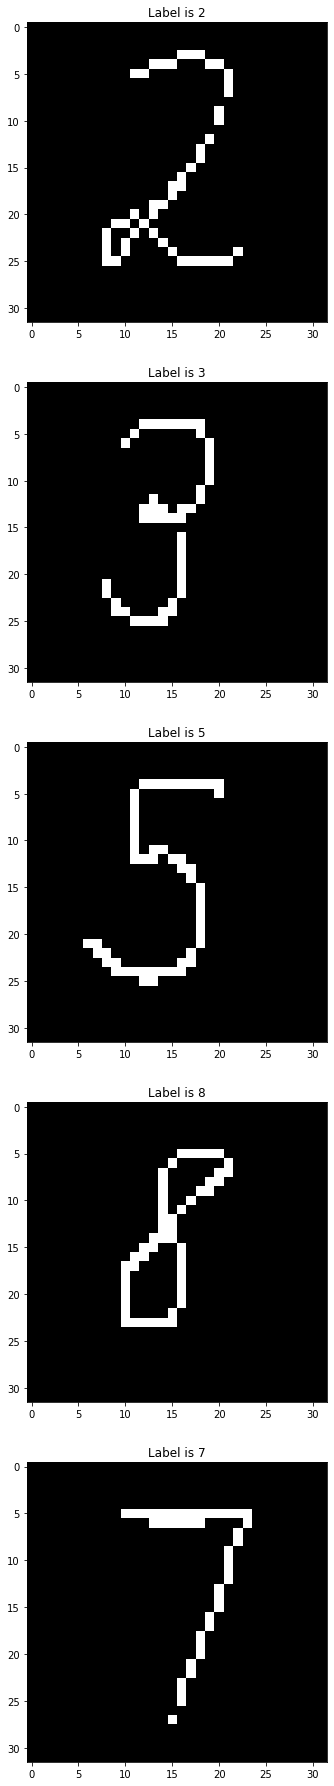

In [7]:
# Making a prediction on 5 input images

fig = plt.figure(figsize = (32, 32))
columns = 1
rows = 5

img_path = 'image1.jpg'
img = image.load_img(img_path, target_size = (28, 28))
gray = img.convert('L')
bw = np.asarray(gray).copy()
bw[bw < 128] = 0
bw[bw >= 128] = 255
x = image.img_to_array(bw)
x = np.expand_dims(x, axis = 0)
x = np.pad(x, ((0, 0),(2, 2), (2, 2), (0, 0)), 'constant')
fig.add_subplot(rows, columns, 1)
plt.title('Label is {label}'.format(label = np.argmax(model.predict(x))))
plt.imshow(x.reshape(32, 32), cmap = plt.get_cmap('gray'))

img_path = 'image2.jpg'
img = image.load_img(img_path, target_size = (28, 28))
gray = img.convert('L')
bw = np.asarray(gray).copy()
bw[bw < 128] = 0
bw[bw >= 128] = 255 
x = image.img_to_array(bw)
x = np.expand_dims(x, axis = 0)
x = np.pad(x, ((0, 0),(2, 2), (2, 2), (0, 0)), 'constant')
fig.add_subplot(rows, columns, 2)
plt.title('Label is {label}'.format(label = np.argmax(model.predict(x))))
plt.imshow(x.reshape(32, 32), cmap = plt.get_cmap('gray'))

img_path = 'image3.jpg'
img = image.load_img(img_path, target_size = (28, 28))
gray = img.convert('L')
bw = np.asarray(gray).copy()
bw[bw < 128] = 0  
bw[bw >= 128] = 255 
x = image.img_to_array(bw)
x = np.expand_dims(x, axis = 0)
x = np.pad(x, ((0, 0),(2, 2), (2, 2), (0, 0)), 'constant')
fig.add_subplot(rows, columns, 3)
plt.title('Label is {label}'.format(label = np.argmax(model.predict(x))))
plt.imshow(x.reshape(32, 32), cmap = plt.get_cmap('gray'))

img_path = 'image4.jpg'
img = image.load_img(img_path, target_size = (28, 28))
gray = img.convert('L')
bw = np.asarray(gray).copy()
bw[bw < 128] = 0  
bw[bw >= 128] = 255 
x = image.img_to_array(bw)
x = np.expand_dims(x, axis = 0)
x = np.pad(x, ((0, 0),(2, 2), (2, 2), (0, 0)), 'constant')
fig.add_subplot(rows, columns, 4)
plt.title('Label is {label}'.format(label = np.argmax(model.predict(x))))
plt.imshow(x.reshape(32, 32), cmap = plt.get_cmap('gray'))

img_path = 'image5.jpg'
img = image.load_img(img_path, target_size = (28, 28))
gray = img.convert('L')
bw = np.asarray(gray).copy()
bw[bw < 128] = 0  
bw[bw >= 128] = 255
x = image.img_to_array(bw)
x = np.expand_dims(x, axis = 0)
x = np.pad(x, ((0, 0),(2, 2), (2, 2), (0, 0)), 'constant')
fig.add_subplot(rows, columns, 5)
plt.title('Label is {label}'.format(label = np.argmax(model.predict(x))))
plt.imshow(x.reshape(32, 32), cmap = plt.get_cmap('gray'))